# Social Network Ads

Social network advertising, also social media targeting, is a group of terms that are used to describe forms of online advertising that focus on social networking services. One of the major benefits of this type of advertising is that advertisers can take advantage of the users’ demographic information and target their ads appropriately.Advantages are advertisers can reach users who are interested in their products, allows for detailed analysis and reporting, information gathered is real, not from statistical projections, does not access IP-addresses of the users.


## Data
For this study, we collected data from trusted website.
Data contains 5 columns.

__UserID__ - Each person has a unique ID from which we can identify the person uniquely.

__Gender__ - Person can male or female. This field is very important for our hypothesis.

__Age__ - Age of the person. Because our product can be useful to some ages only.

__EstimatedSalary__ - This column contains salary of a person as salary can affect the shopping of a person.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv("Social_Network_Ads.csv")

In [2]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
print(dataset.isnull().sum())
print(dataset.shape)

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
(400, 5)


We have total 400 rows and 5 columns, Out of 5 columns UserId is not of any use, so we can drop that. Gender columns has two attribute Male & Female. Our Target Column is Purchased with values of 0 and 1. There is no missing value in our dataset.

In [17]:
dataset.drop('User ID', axis = 1, inplace = True)

# Statistical Summary

In [10]:
dataset.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.510000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,1.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


Age is spread between 18 to 60, with an average of 37.65 and Std Dev of 10.48 & Estimated Salary between 15000 to 150,000, with an average of 69,742.5 and Std Dev of 34,096.96.

<AxesSubplot:xlabel='Purchased', ylabel='count'>

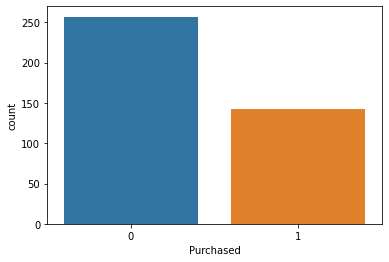

In [12]:
sns.countplot(x = 'Purchased', data = dataset)

In [15]:
dataset.Gender.value_counts()

1    204
0    196
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

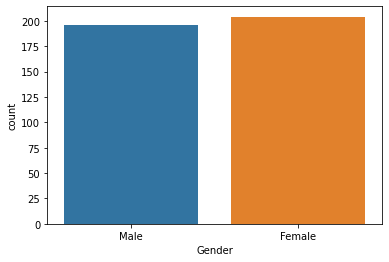

In [13]:
sns.countplot(x = 'Gender', data = dataset)

# Encoding categorical feature

In our dataset, Gender column is only categorical value,and we need to conver it to numerical value. For this purpose, I will use __replace__ method

In [14]:
dataset['Gender'].replace('Female', 1, inplace=True)
dataset['Gender'].replace('Male', 0, inplace=True)
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


# Correlation Matrix

In [19]:
train_corr  = dataset.corr(method='pearson').abs()
train_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Gender,Age,EstimatedSalary,Purchased
Gender,1.00,0.07,0.06,0.04
Age,0.07,1.00,0.16,0.62
EstimatedSalary,0.06,0.16,1.00,0.36
Purchased,0.04,0.62,0.36,1.00


As we can see from the correlation matrix, our matrix's features has no highly correlated variables.Most correlated features are Purchase and Age(0.62)

# Dataset Splitting

In [6]:
X = dataset.iloc[:,1:4].values
y = dataset.iloc[:,4].values

In [23]:
print(X.shape)
print(y.shape)

(400, 3)
(400,)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

## Standart Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Modeling

In this project I use __KNearestNeighbor__ alghoritm

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [29]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [30]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

# Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

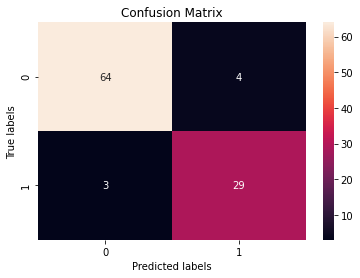

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

In [33]:
accuracy = classifier.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

Accuracy of the model is 93.0 %


In [35]:
from sklearn.metrics import f1_score
f1_score = f1_score(y_test, y_pred)
print('F1_score of the model is',f1_score * 100,'%')

F1_score of the model is 89.23076923076923 %
